Here we simulate the ARMA procee

## 1. White Noise process

In [1]:
##simulate normal / exponential WN
w1=rnorm(1000,0.1)
w2=rexp(1000,1)

## Re-scale to mean 0 and sd 1
W1=(w1-mean(w1))/sqrt(var(w1))
W2=(w2-mean(w2))/sqrt(var(w2))

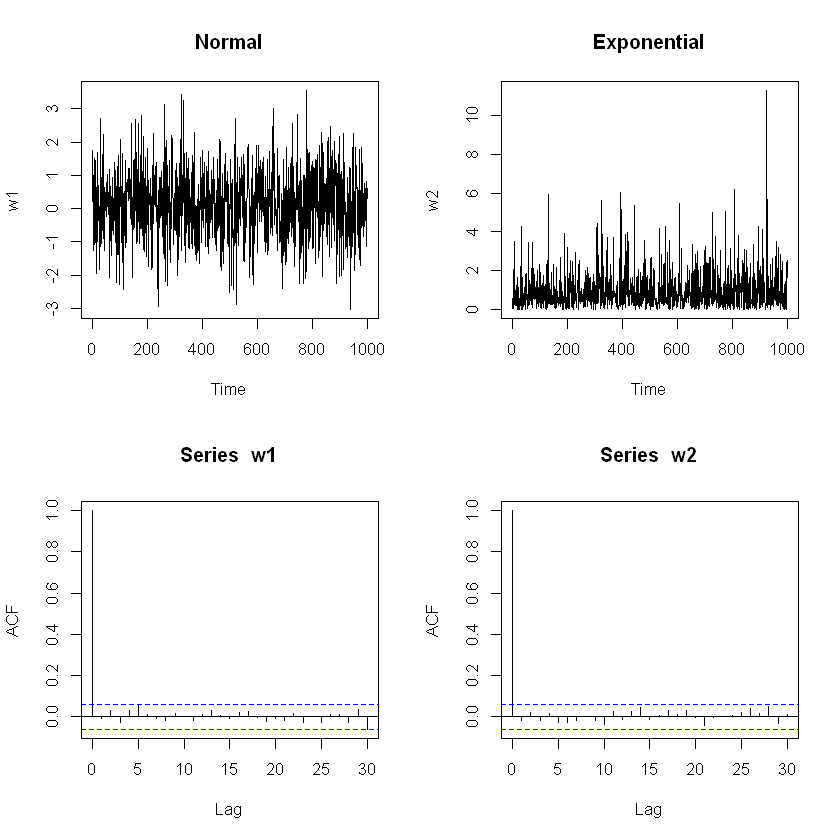

In [2]:
##plot ts and their acf's
w1=ts(w1,start=1,deltat = 1)
w2=ts(w2,start=1,deltat = 1)

par(mfrow=c(2,2))
ts.plot(w1,main='Normal')
ts.plot(w2,main='Exponential')
acf(w1)
acf(w2)

# 2. Moving average

In [3]:
## Simulate White Noise
w1=rnorm(502)
w2=rexp(502)-1

##set coefficient
a=c(1,-.5,.2) 
a1=c(1,.5,.2)

a: $X_t=Z_t-0.5Z_{t-1}+0.2Z_{t-2}$

a1: $X_t=Z_t-0.5Z_{t-1}+0.2Z_{t-2}$

## Simlulate MA(2) with Normal/Exponential WN:
with `filter` and `side =1`. 

*Note: If sides = 1 the filter coefficients are for past values only; if sides = 2 they are centred around lag 0.*

We will only consider the process starting with three since the first two values are lost because we need to generate the $x_3$ given a Z1 and Z2. But there is no past white noise series to generate x1 and x2.

In [4]:
##1:Normal: -0.5
ma2.11=filter(w1,filter=a,side=1)
ma2.11=ma2.11[3:502]
##2:Normal: 0.5
ma2.12=filter(w1,filter=a1,side=1)
ma2.12=ma2.12[3:502]

##3:Exponential: -0.5
ma2.21=filter(w2,filter=a,side=1)
ma2.21=ma2.21[3:502]
##4:Exponential: 0.5
ma2.22=filter(w2,filter=a1,side=1)
ma2.22=ma2.22[3:502]

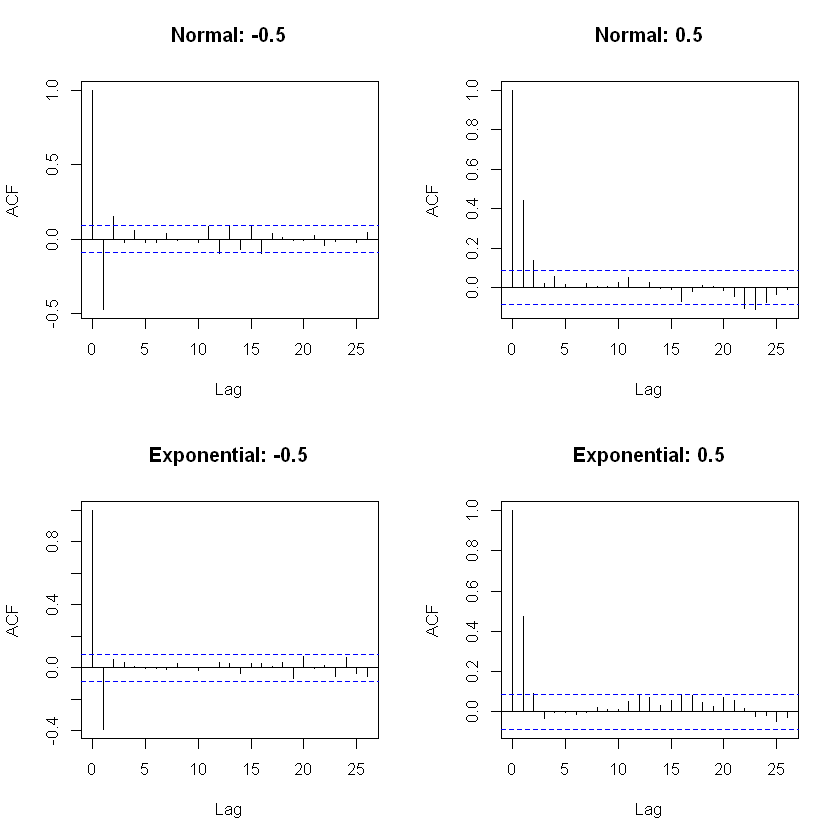

In [5]:
par(mfrow=c(2,2))
acf(ts(ma2.11), main='Normal: -0.5')
acf(ts(ma2.12), main='Normal: 0.5')
acf(ts(ma2.21), main='Exponential: -0.5')
acf(ts(ma2.22), main='Exponential: 0.5')

All of them have, have the first two values of the ACF large,outside of the confidence band. Whereas for other lags the sample auto-correlation is small, close to 0. This is a characteristic of an MA process.

There is a difference between the ACF plots for the two different sets of coefficients.The sample ACF is positive for lag equal to 1, for the processes with coefficient 0.5 and 0.2, versus it is negative, a lag equal to 1 for the processes with coefficients -0.5 and 0.2. That is although Xt is modeled as a moving average model, thus, a linear combination of white noise, then Xt and Xt-1 are still dependent on the sample sequence of white noise. Thus, they are correlated. This correlation is reflected in the ACF plots.

## MA: Non-stationary noise

In [6]:
##simulate white noise
w1=rnorm(502)
##set coefficients
a4=c(1,.2,.8,1.2)

here we set the noise $Z_t=\text{WN}(0,1)*2t+0.5$ that is the noise is non-stationary. From the plot we see that it is non-stationary, its distribution changes as the time shift.

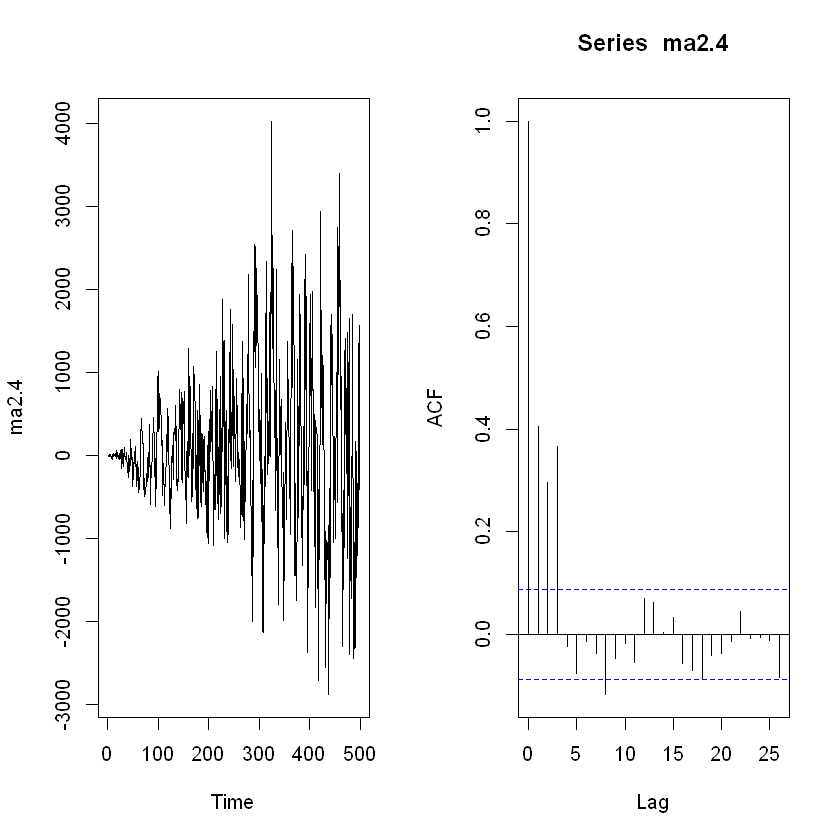

In [7]:
## Simulate MA(3) with non-stationary noise
ma2.4=filter(w1*2*(1:502)+0.5,filter=a4,side=1)
ma2.4=ma2.4[4:502]
par(mfrow=c(1,2))
ts.plot(ma2.4)
acf(ma2.4)

However, the acf plot does not indicate non stationarity. We see that the sample ACF is large for lag 0, 1, 2 and 3, but not for higher lags which is an indication of an MA process (MA3). 

The sample ACP still indicate MA process even if the noise Zt is non-stationary. This may not be the case for other process with non-stationary noise.

# 3. Autoregressive Process
With `filter` function along with `method='recursive'`

Non-stationary AR(2): $X_t=0.8X_{t-1}+0.2X_{t-2}+Z_t$

In [8]:
## Non-stationary AR(2)
w2=rnorm(1500)
a2=c(0.8,0.2)
ar2=filter(w2,filter=a2,method='recursive')
ar2=ar2[1251:1500]

Stationary AR(1): $X_t=0.5X_{t-1}+Z_t$

In [9]:
a1=0.5
ar1=filter(w2,filter=a1,method='recursive')
ar1=ar1[1251:1500]

Now we compare the both plot

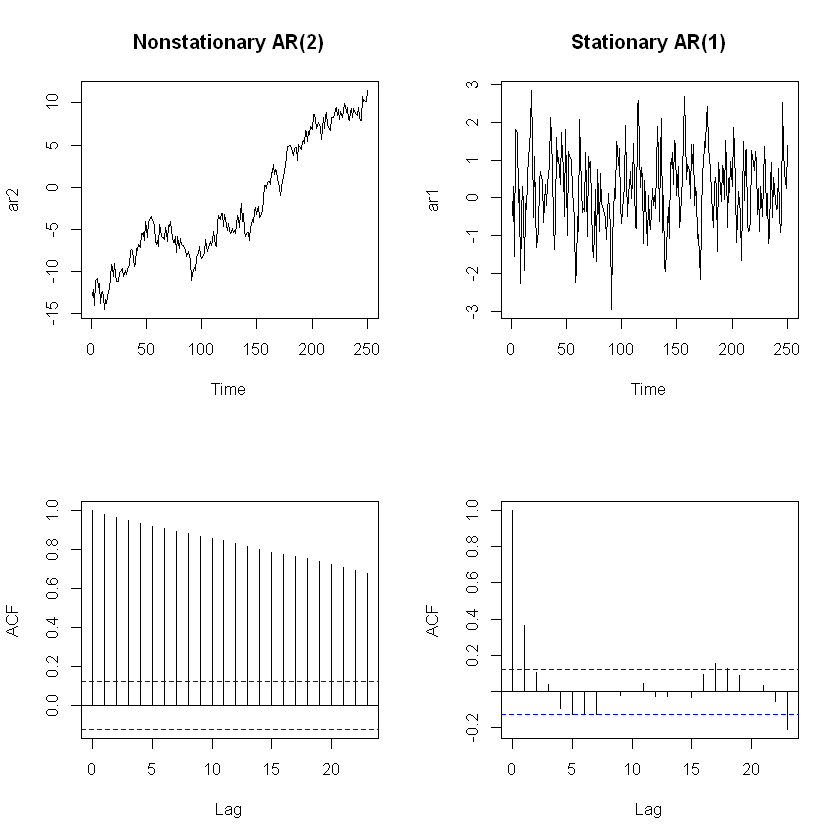

In [10]:
par(mfrow=c(2,2))
ts.plot(ar2,main='Nonstationary AR(2)')
ts.plot(ar1,main="Stationary AR(1)")
acf(ar2,main='')
acf(ar1,main='')

For Autoregressive Process the ACF plot show clearly the non-stationarity when ACF values decrease slowly.

On the other hand, if we check the ACF for AR(1). This sample ACF is large for lag 0, 1, 2, and 3 only. Note that we cannot use ACF plot to identify the lag of the AR process as we did for MA process.

# 4. Causal

We can invert an AR model to MA model and MA model to AR model, under condition: **causal process**. Note that not all ARMA processes are causal.

An ARMA process {$𝑋_𝑡$} is a causal function of $Z_t$ if there exist constants {$\psi_𝑗$}  such that $\sum_{j=0}^{\infty}|\psi_𝑗|<\infty$ and

$X_t=\sum_{j=0}^{\infty} \psi_𝑗 Z_{t-j}$ for all $t\in\mathbb{Z}$                                                              
{$𝑋_𝑡$} is causal if and only if $\theta(z)\ne 0$ for all $z\in\mathbb{C}$ such that $|z|\le1$

The coefficients for an intertible process are given vy
$$\psi(z)=\sum_{j=0}^{\infty} \psi_j z^j=\frac{\theta(z)}{\phi(z)},\quad |z|\le1$$

For AR(1) process {$X_t$} is causal if |$\phi$|<1

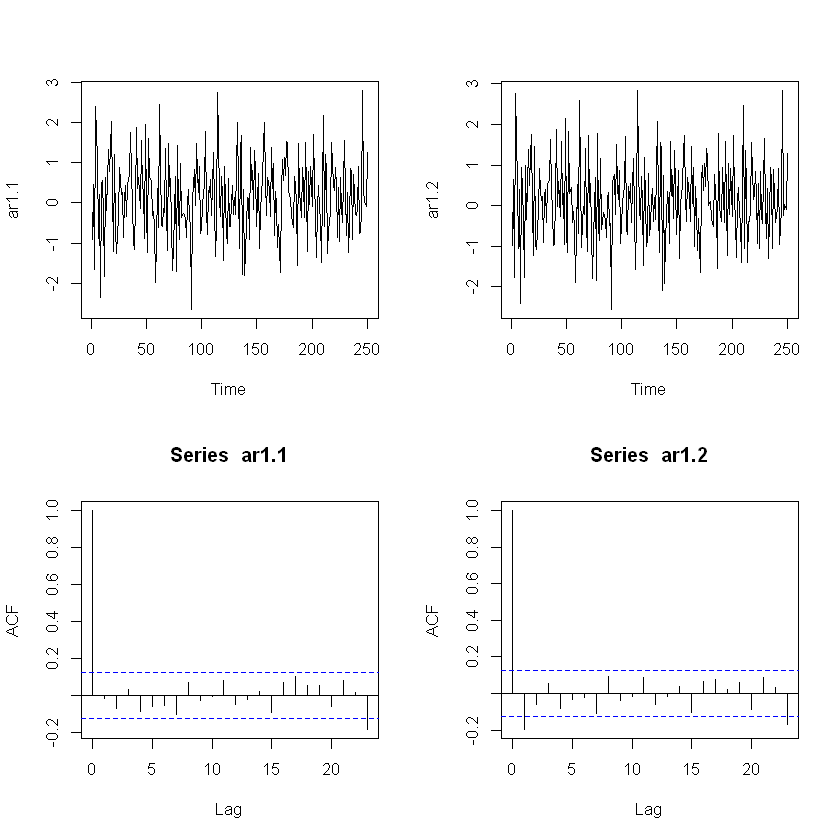

In [11]:
# Causal AR(1) processes(|phi|=0.1<1)
a1=0.1
ar1=filter(w2,filter=a1,method='recursive') #w2=rnorm(1500)
ar1.1=ar1[1251:1500]
a2=-0.1
ar2=filter(w2,filter=a2,method='recursive') #w2=rnorm(1500)
ar1.2=ar2[1251:1500]
par(mfrow=c(2,2))
ts.plot(ar1.1)
ts.plot(ar1.2)
acf(ar1.1)
acf(ar1.2)

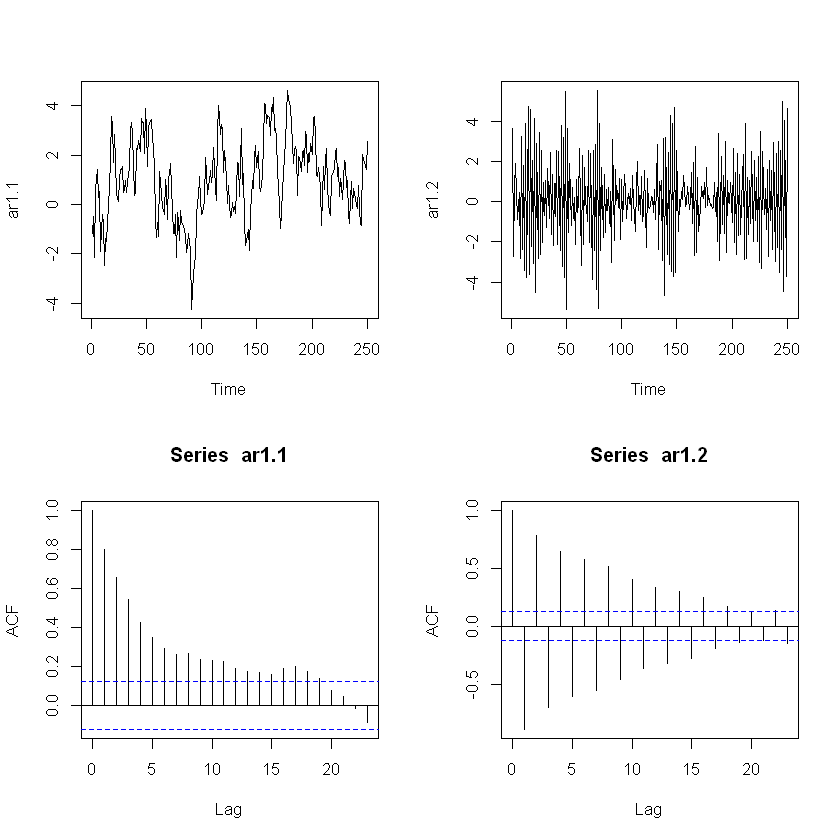

In [12]:
# Causal AR(1) processes reaching non-causality/stationary(|phi|=0.9)
a1=0.9
ar1=filter(w2,filter=a1,method='recursive') #w2=rnorm(1500)
ar1.1=ar1[1251:1500]
a2=-0.9
ar2=filter(w2,filter=a2,method='recursive') #w2=rnorm(1500)
ar1.2=ar2[1251:1500]
par(mfrow=c(2,2))
ts.plot(ar1.1)
ts.plot(ar1.2)
acf(ar1.1)
acf(ar1.2)

**Comment:**
With |phi|=0.1 times series plot show clear stationarity as there is not a pattern in this time series. On the other hand, the plots for |phi|=0.9 show some sign of non-stationarity, the departure from the mean 0 is very prolonged. (due to 0.9 very close to 1)

# 5. Invertibility

We can go from a ARMA process to an AR process where the order can be infinity meaning that the ARMA ininfinity meangining that the ARMA process is invertible.

An ARMA process {$𝑋_𝑡$} is invertible if there exist constants {$\pi_𝑗$}  such that $\sum_{j=0}^{\infty}|\pi_j|<\infty$ and

$Z_t=\sum_{j=0}^{\infty} \pi_j X_{t-j}$ for all $t\in\mathbb{Z}$                                                              
{$𝑋_𝑡$} is invertible if and only if $\theta(z)\ne 0$ for all $z\in\mathbb{C}$ such that $|z|\le1$

The coefficients for an intertible process are given vy
$$\pi(z)=\sum_{j=0}^{\infty} \pi_j z^j=\frac{\phi(z)}{\theta(z)},\quad |z|\le1$$